# Heart Stroke Prediction

## Importing libraries

In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss


In [4]:
#Loading the dataset
df = pd.read_csv("C://Users//Himali Banda//Downloads////healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
row,column=df.shape
print("Total column:",column)
print("Total row:",row)

Total column: 12
Total row: 5110


In [9]:
categorial=df.select_dtypes(include=["object"]).keys()
print(categorial)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [10]:
quantitative=df.select_dtypes(include=["int64","float64"]).keys()
print(quantitative)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


## Data Preprocessing

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
df.drop('id', axis=1, inplace=True)

In [14]:
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [18]:
#Checking for null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
#replacing the missing values with the most frequent value
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)
df

C:\Users\Himali Banda\AppData\Local\Temp\ipykernel_15644\647421238.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Check values and their count in the columns

In [20]:
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


#### Replacing the values in columns with numerical values

- Residence Type: Urban = 1, Rural = 0
- Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
-   Ever_Maried : Yes = 1, No = 0
- Gender : Male = 1, Female = 0, Other = 2
- Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4


In [23]:
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': 2})
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})
df['work_type'] = df['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,61.0,0,0,1,1,0,202.21,28.7,1,1
2,1,80.0,0,1,1,0,0,105.92,32.5,1,1
3,0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,0,79.0,1,0,1,1,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.7,1,0
5106,0,81.0,0,0,1,1,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,1,0,82.99,30.6,1,0
5108,1,51.0,0,0,1,0,0,166.29,25.6,0,0


In [28]:
df.groupby('gender')['gender'].count()


gender
0    2994
1    2115
2       1
Name: gender, dtype: int64

In [29]:
df.groupby('age')['heart_disease'].count()

age
0.08       2
0.16       3
0.24       5
0.32       5
0.40       2
        ... 
78.00    102
79.00     85
80.00     70
81.00     60
82.00     56
Name: heart_disease, Length: 104, dtype: int64

## Exploratory Data Analysis

#### Find correlation between the variables

<Axes: >

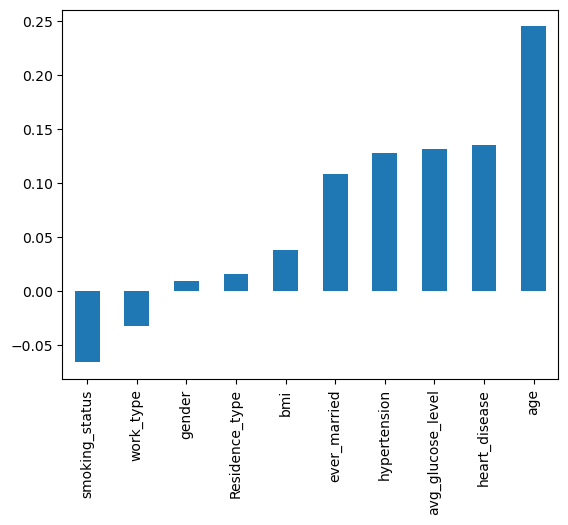

In [40]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

<Axes: title={'center': 'Feature Correlation with Stroke (%)'}>

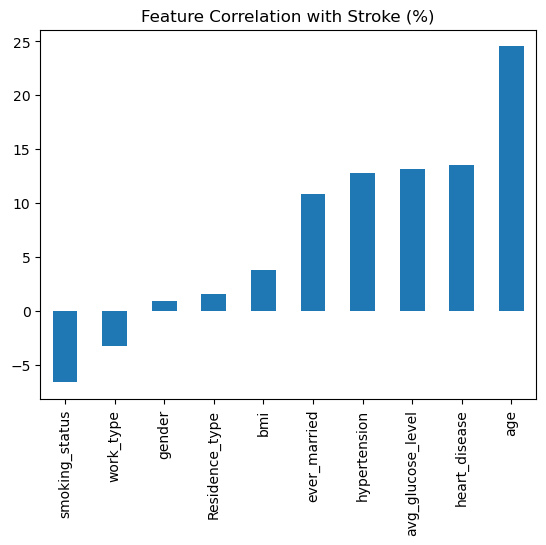

In [30]:
df.corr()['stroke'].drop('stroke').mul(100).sort_values().plot(kind='bar', title="Feature Correlation with Stroke (%)")


<Axes: >

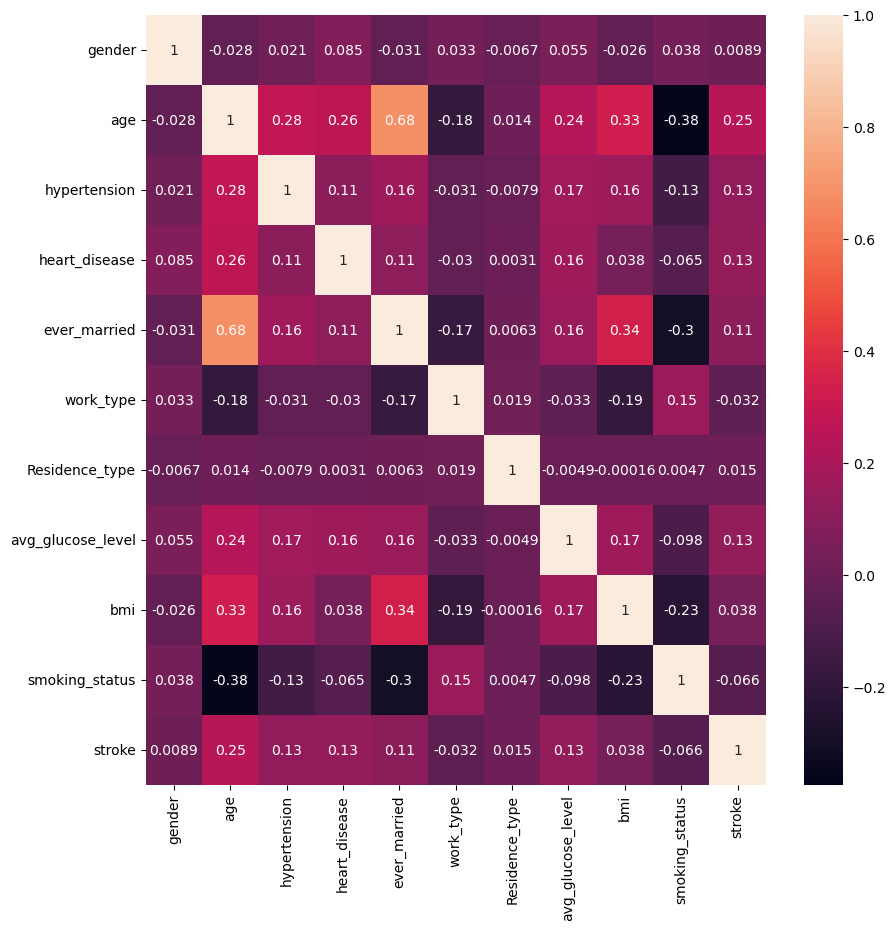

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [42]:
# replace age with number wrt to age group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,0,1,228.69,36.6,0,1
1,0,4,0,0,1,1,0,202.21,28.7,1,1
2,1,4,0,1,1,0,0,105.92,32.5,1,1
3,0,3,0,0,1,0,1,171.23,34.4,2,1
4,0,4,1,0,1,1,0,174.12,24.0,1,1


## Visulaizing the data

<Axes: xlabel='gender', ylabel='count'>

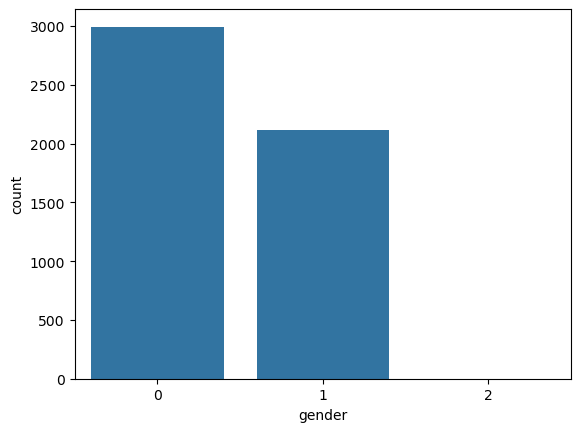

In [43]:
sns.countplot(x = 'gender', data = df)

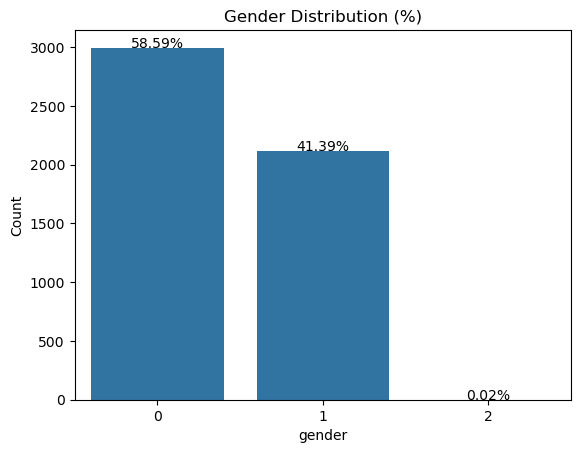

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
ax = sns.countplot(x='gender', data=df)

# Convert counts to percentages and annotate bars
total = len(df)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(),
            f'{100 * p.get_height() / total:.2f}%', ha='center')

plt.ylabel("Count")
plt.title("Gender Distribution (%)")
plt.show()


<Axes: xlabel='Residence_type', ylabel='count'>

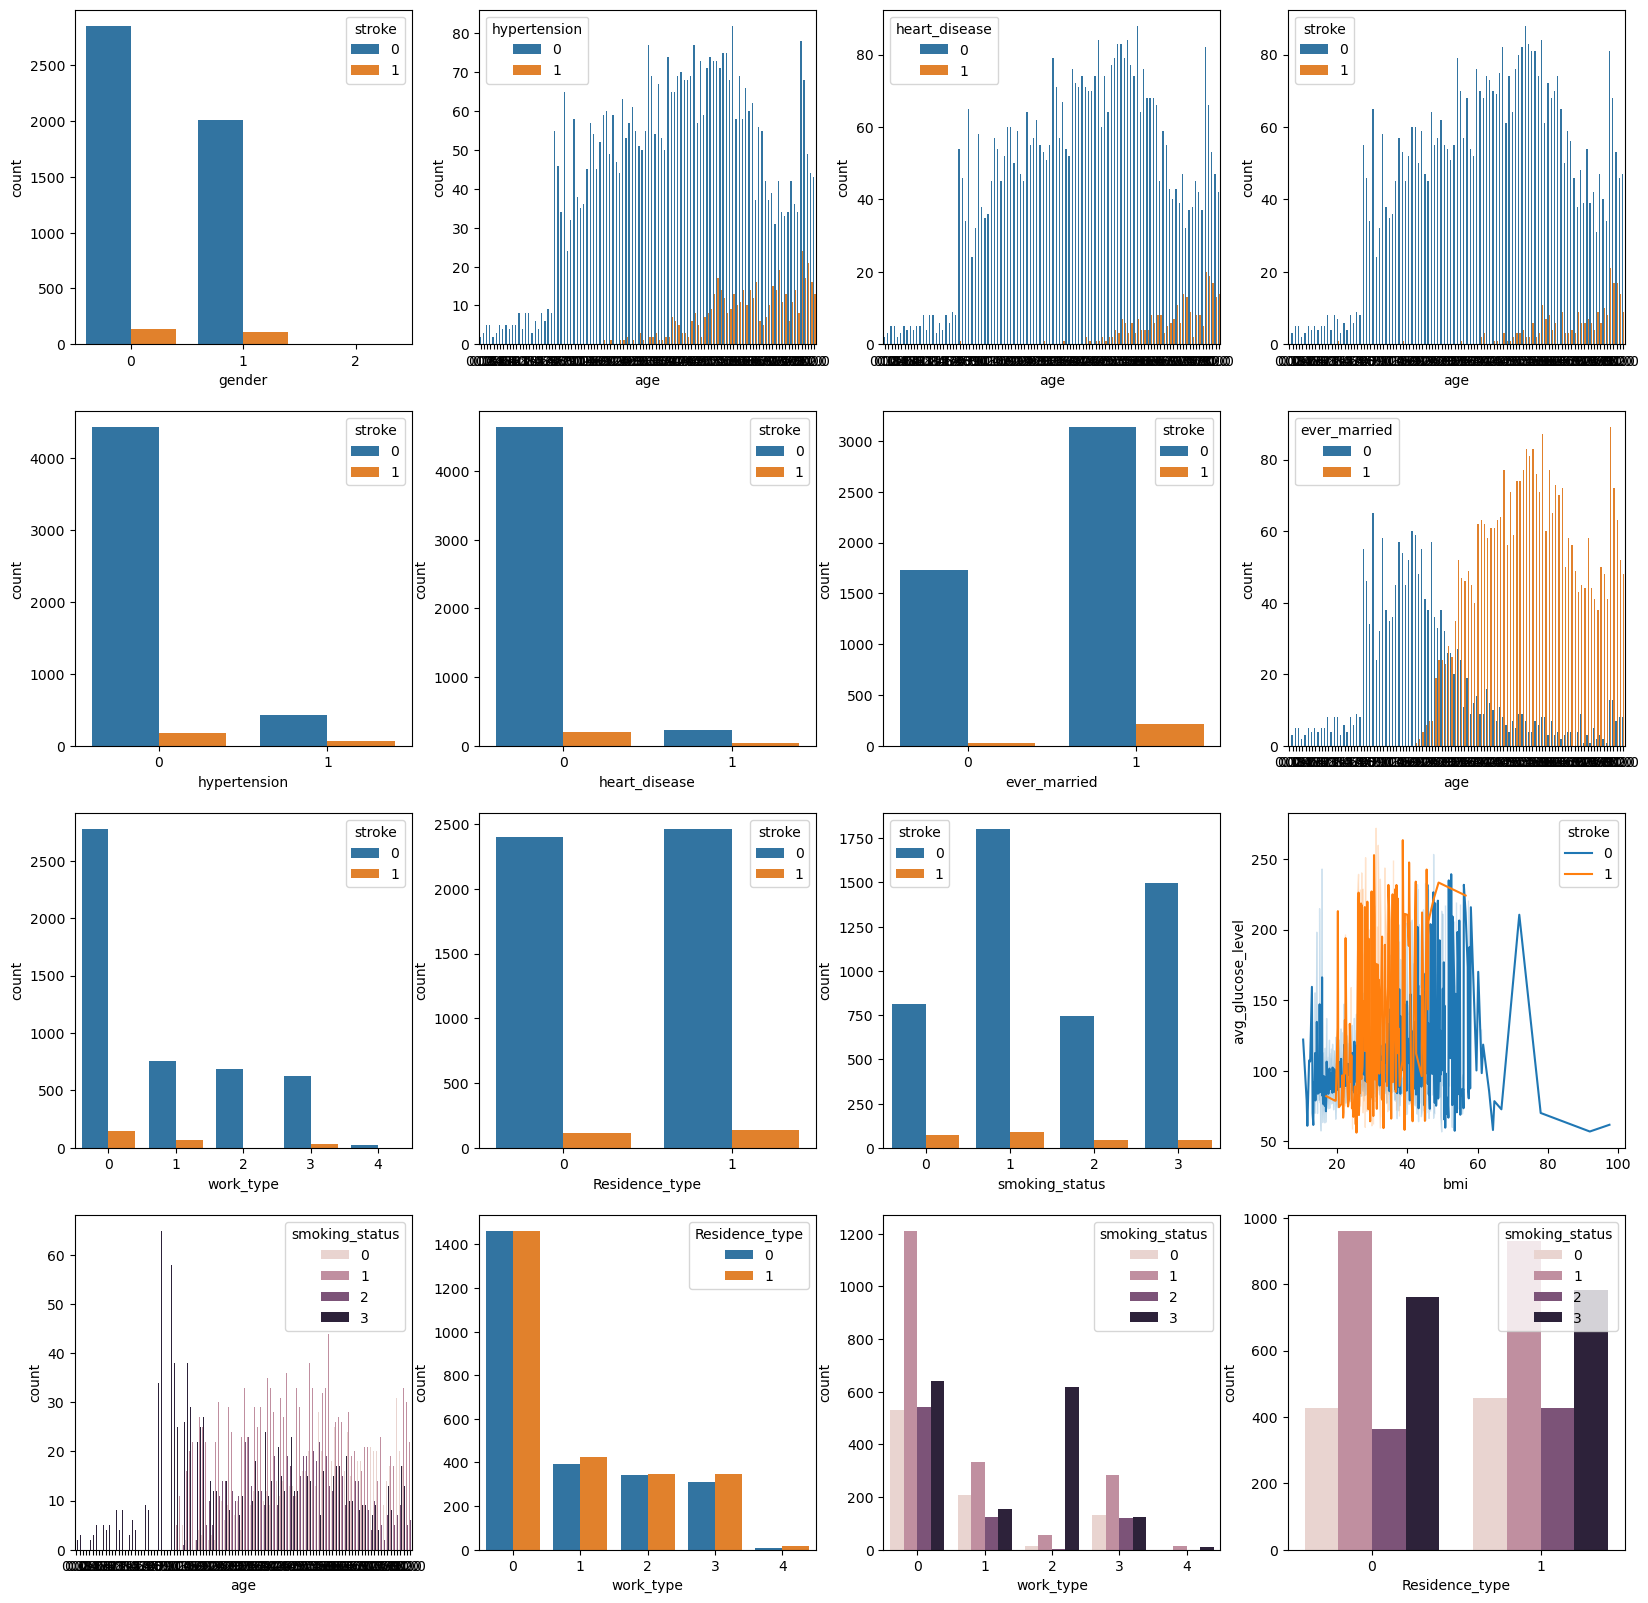

In [34]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

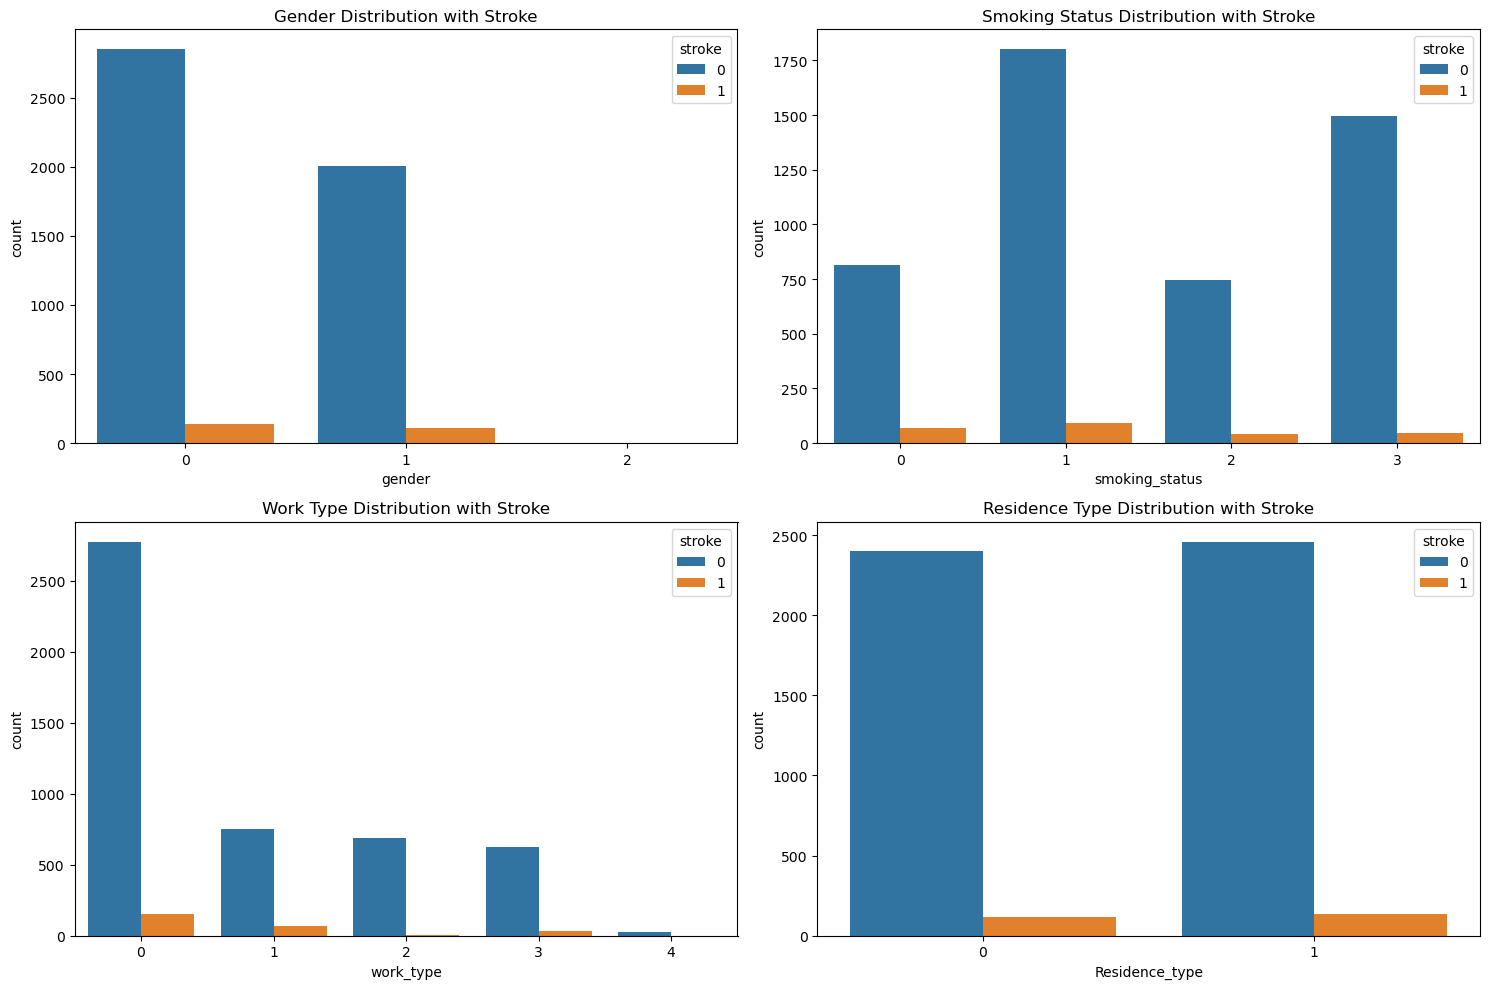

In [35]:
# Set figure size
plt.figure(figsize=(15, 10))

# Countplots for categorical variables
plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=df, hue='stroke')
plt.title("Gender Distribution with Stroke")

plt.subplot(2, 2, 2)
sns.countplot(x='smoking_status', data=df, hue='stroke')
plt.title("Smoking Status Distribution with Stroke")

plt.subplot(2, 2, 3)
sns.countplot(x='work_type', data=df, hue='stroke')
plt.title("Work Type Distribution with Stroke")

plt.subplot(2, 2, 4)
sns.countplot(x='Residence_type', data=df, hue='stroke')
plt.title("Residence Type Distribution with Stroke")

plt.tight_layout()
plt.show()


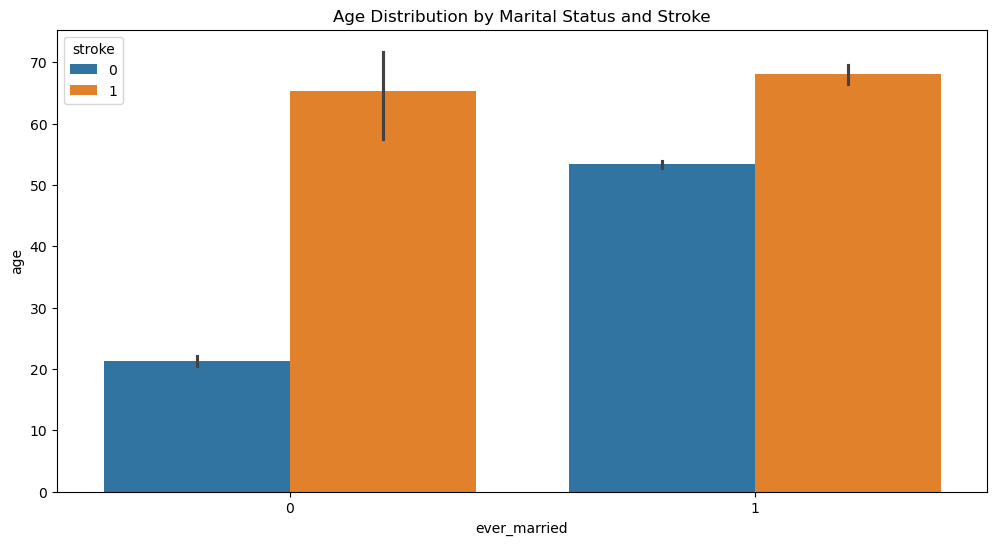

In [36]:
#Generate Bar Graphs (For Numerical Data)
plt.figure(figsize=(12, 6))
sns.barplot(x="ever_married", y="age", data=df, hue="stroke")
plt.title("Age Distribution by Marital Status and Stroke")
plt.show()


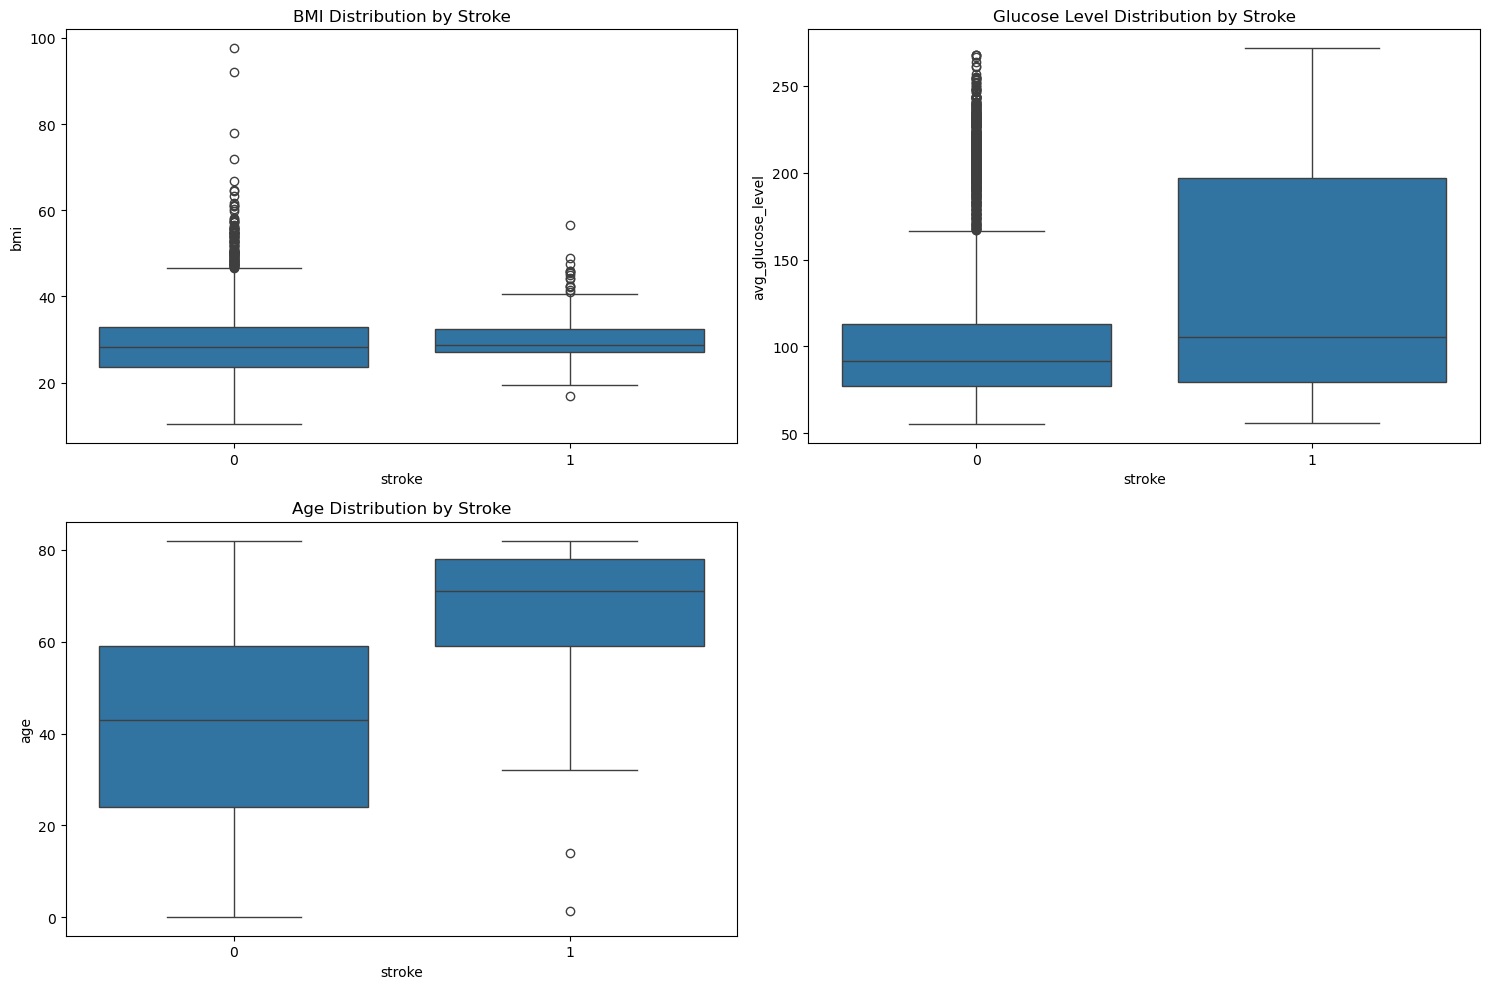

In [37]:
#Generate Box Plots (To Show Distribution and Outliers)
plt.figure(figsize=(15, 10))

# BMI Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title("BMI Distribution by Stroke")

# Avg Glucose Level Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title("Glucose Level Distribution by Stroke")

# Age Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age Distribution by Stroke")

plt.tight_layout()
plt.show()


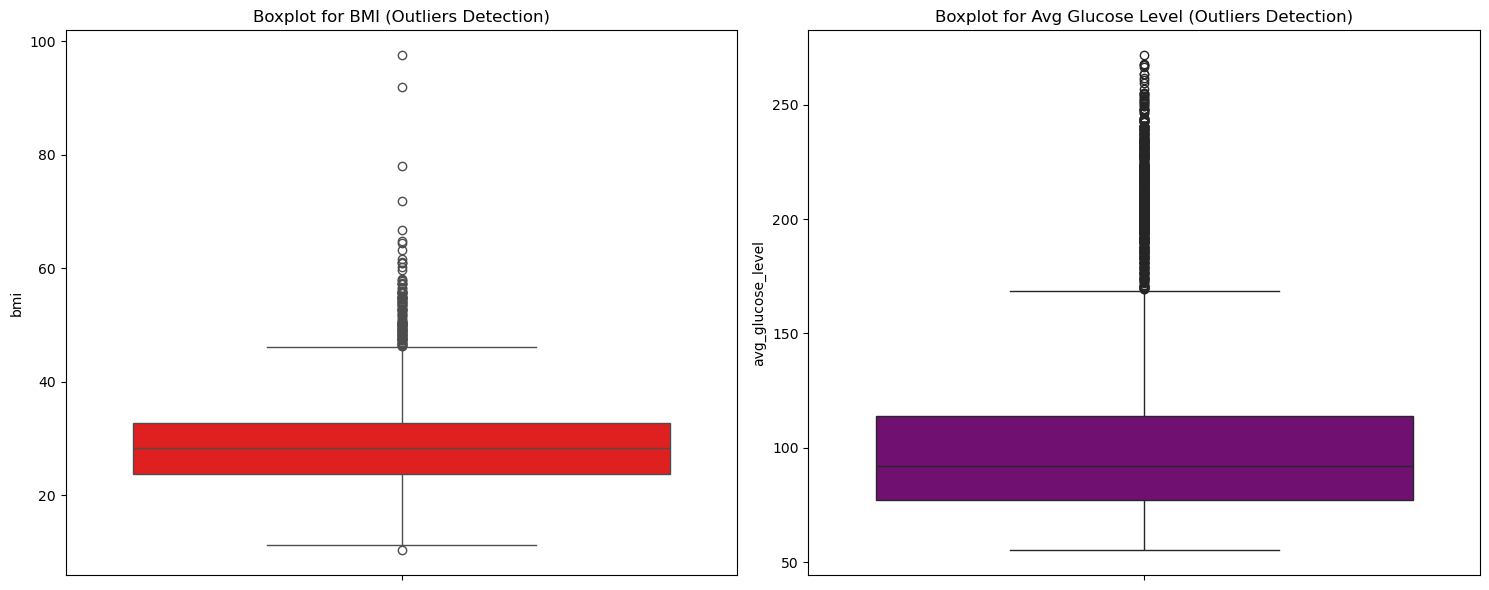

In [38]:
#detect and visualize outlier
plt.figure(figsize=(15, 6))

# Outliers in BMI
plt.subplot(1, 2, 1)
sns.boxplot(y=df['bmi'], color='red')
plt.title("Boxplot for BMI (Outliers Detection)")

# Outliers in Avg Glucose Level
plt.subplot(1, 2, 2)
sns.boxplot(y=df['avg_glucose_level'], color='purple')
plt.title("Boxplot for Avg Glucose Level (Outliers Detection)")

plt.tight_layout()
plt.show()


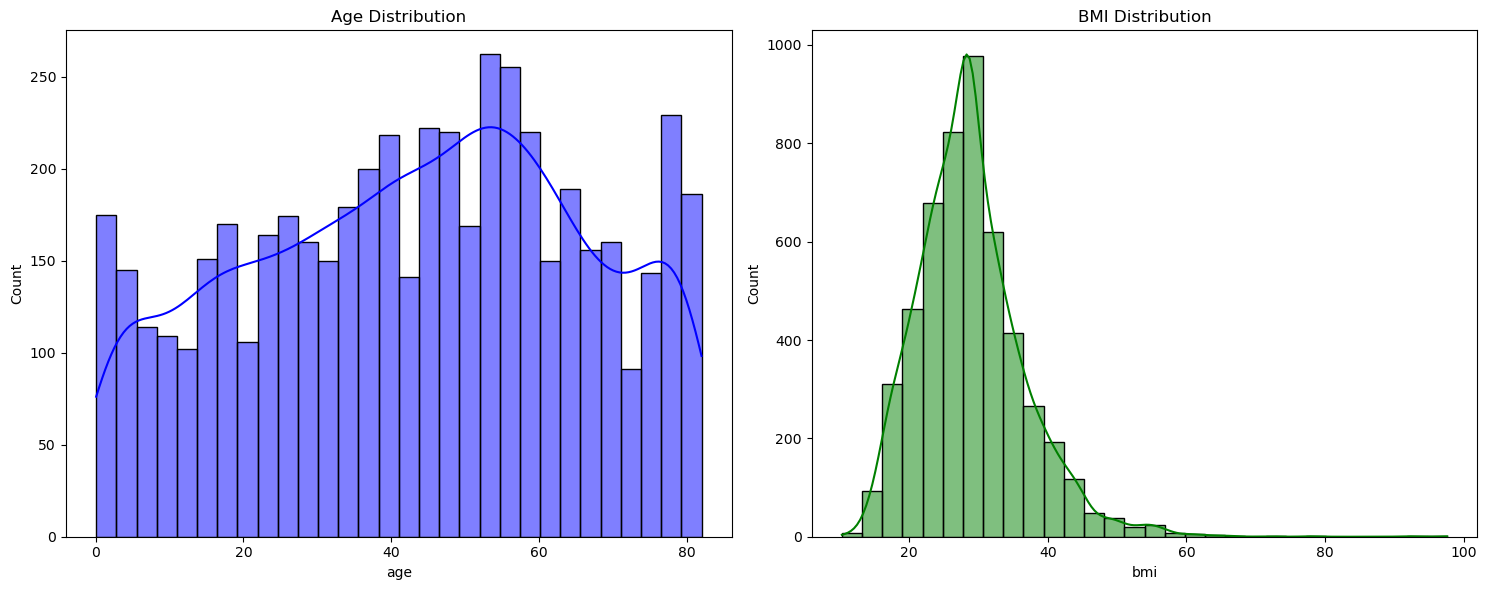

In [39]:
#histogram
plt.figure(figsize=(15, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")

# Histogram for BMI
plt.subplot(1, 2, 2)
sns.histplot(df['bmi'].dropna(), bins=30, kde=True, color='green')
plt.title("BMI Distribution")

plt.tight_layout()
plt.show()


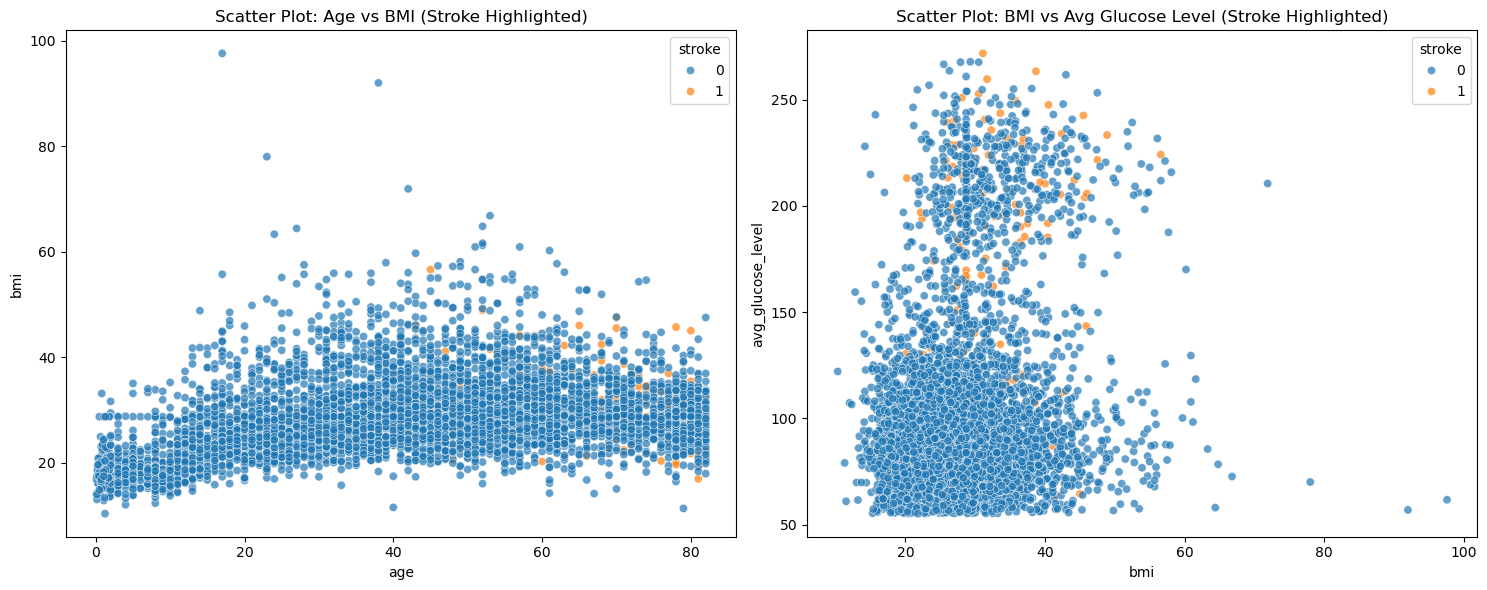

In [40]:
#scatterplot
plt.figure(figsize=(15, 6))

# Scatter plot: Age vs BMI
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, alpha=0.7)
plt.title("Scatter Plot: Age vs BMI (Stroke Highlighted)")

# Scatter plot: BMI vs Glucose Level
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='stroke', data=df, alpha=0.7)
plt.title("Scatter Plot: BMI vs Avg Glucose Level (Stroke Highlighted)")

plt.tight_layout()
plt.show()


## Train Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1), df['stroke'], test_size=0.2, random_state=42)

## Model Training

### Logistic Regression

In [42]:
lr = LogisticRegression()
lr

LogisticRegression()

In [43]:
#training the model
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\Himali Banda\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9373776908023483

In [44]:
#testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9373776908023483

### Support Vector Machine (SVM)

In [45]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [46]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9393346379647749

In [47]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [49]:
#training the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9158512720156555

In [50]:
#testing the model
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9158512720156555

### K-Nearest Neighbors (KNN)

In [51]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [52]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9354207436399217

In [53]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9354207436399217

## Model Evaluation

### Logistic Regression

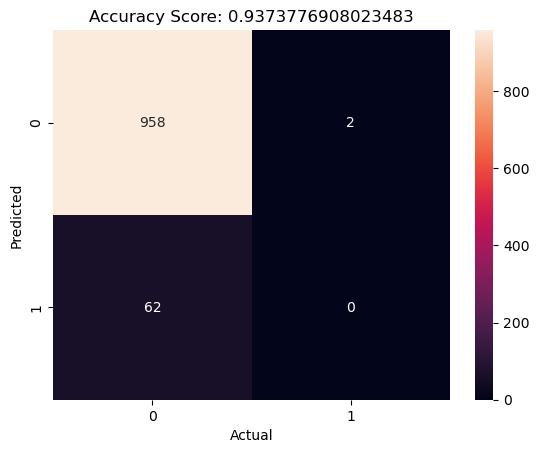

In [54]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [55]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss: ',log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9373776908023483
Logistic Regression Model F1 score:  0.0
Logistic Regression Model Mean Absolute Error:  0.06262230919765166
Logistic Regression Model Mean Squared Error:  0.06262230919765166
Logistic Regression Model log loss:  2.2571368071462796


### Support Vector Machine (SVM)

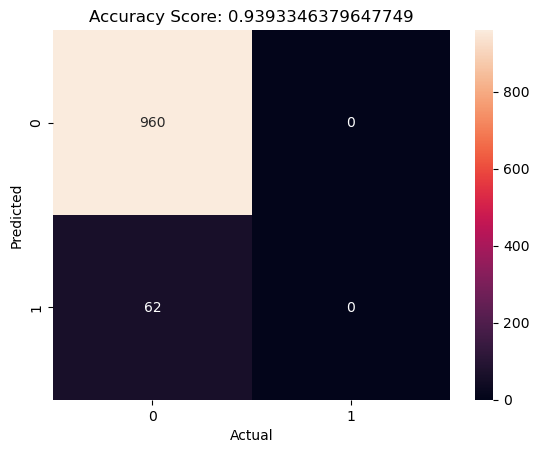

In [56]:
sns.heatmap(metrics.confusion_matrix(y_test, sv_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, sv_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [57]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, sv_pred))
print('SVM Model F1 score: ',metrics.f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(y_test, sv_pred))
print('SVM Model log loss: ',log_loss(y_test, sv_pred))

SVM Model Accuracy Score: 0.9393346379647749
SVM Model F1 score:  0.0
SVM Model Mean Absolute Error:  0.060665362035225046
SVM Model Mean Squared Error:  0.060665362035225046
SVM Model log loss:  2.1866012819229588


### Decision Tree Classifier

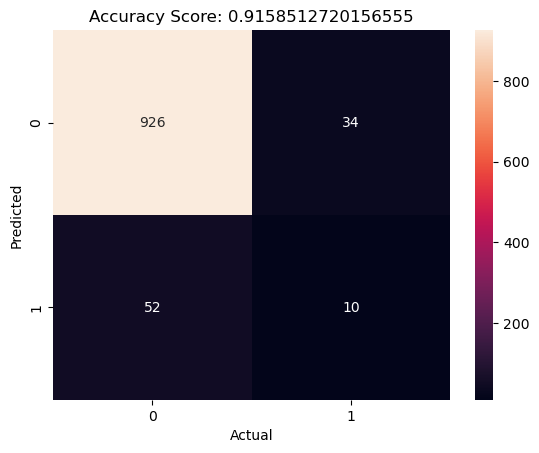

In [58]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [59]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))
print('Decision Tree Model log loss: ',log_loss(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.9158512720156555
Decision Tree Model F1 score:  0.18867924528301888
Decision Tree Model Mean Absolute Error:  0.08414872798434442
Decision Tree Model Mean Squared Error:  0.08414872798434442
Decision Tree Model log loss:  3.0330275846028134


### K-Nearest Neighbors (KNN)

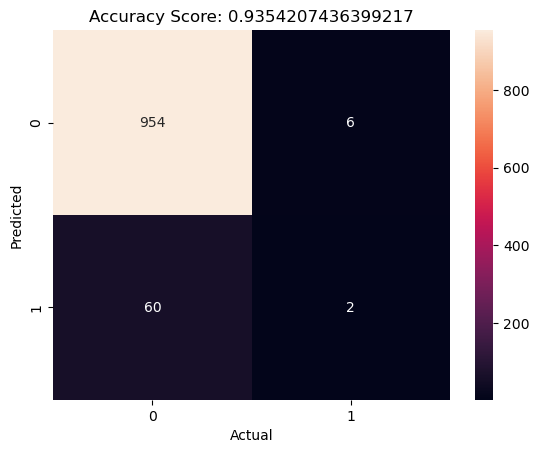

In [60]:
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, knn_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [61]:
print('KNN Model Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN Model F1 score: ',metrics.f1_score(y_test, knn_pred))
print('KNN Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Model Mean Squared Error: ',metrics.mean_squared_error(y_test, knn_pred))
print('KNN Model log loss: ',log_loss(y_test, knn_pred))

KNN Model Accuracy Score: 0.9354207436399217
KNN Model F1 score:  0.05714285714285714
KNN Model Mean Absolute Error:  0.06457925636007827
KNN Model Mean Squared Error:  0.06457925636007827
KNN Model log loss:  2.327672332369601


## Model Comparison

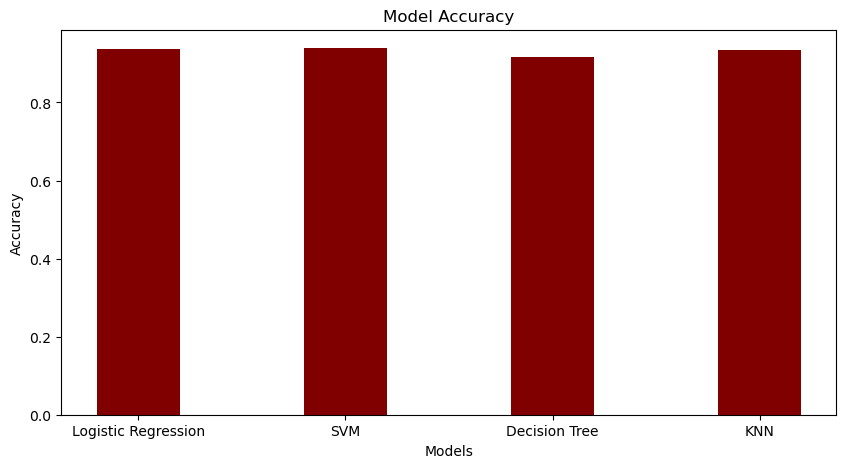

In [62]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

## Conclusion

The model accuracies of Logistic Regression, SVM and KNN  are quite similar i.e. 93.8 %. The accuracy of Decision Tree Classifier is 91.8 %. So, we can use any of these models to predict the heart stroke.

According to the graphs age v/s hypertension, heart disease showing chances of stroke, the number of person having a stroke shows dependece upon heart disease and hypertension. But when we plot the graph of heart disease and hypertension against the stroke, the persons with lower chances of hypertension and heart disease has increased chances of stroke. This is a peculiar thing and needs to be investigated further. In addition to that non somkers have higher chances of stroke than smokers. This is also a peculiar thing and needs to be investigated further. However person having BMI between20 to 50 have higher chances of stroke.

Last but not least other features such as martial status, residence type as well as work type are showing effect on the chances of stroke.